In [1]:
import os
from datetime import datetime
import numpy as np
import pyproj
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
# from shapely.geometry import Point
import h5py
import sys
from matplotlib import cm
import matplotlib
import xarray as xr
#import rioxarray as rxr
#import earthpy as et
#import earthpy.spatial as es
#import earthpy.plot as ep
%matplotlib inline



ModuleNotFoundError: No module named 'earthpy'

In [2]:
import rasterio
import os
import geopandas as gpd

In [3]:
os.chdir('/users/marianne/documents/pe_snow_fires/')
sn_watersheds= gpd.read_file('data/sn_watersheds.shp')

<AxesSubplot:title={'center':'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

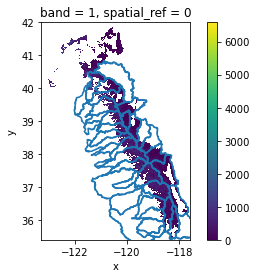

In [17]:
swe = rxr.open_rasterio('swe_max/swe_max_2001.tif')
f,ax=plt.subplots()
swe.plot(ax=ax)
sn_watersheds.boundary.plot(ax=ax)


In [4]:
years = range(1987,2017)
months = ['Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
m_num = range(1,13)
days_in_month = [31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30]
os.chdir('/users/marianne/documents/data/reanalysis')
for yr in years:
    hf = h5py.File('SN_SWE_WY'+ str(yr) + '.h5', 'r')
    swe = hf.get('SWE')
    lat = hf.get('lat')
    lon = hf.get('lon')
    for i in range(len(days_in_month)):
        start = sum(days_in_month[0:i-1])
        end = start + days_in_month[i]
        tmp = swe[start:end,0:2850,:]
        tmp = tmp.astype('float')
        for a in range(days_in_month[i]):
            for b in range(2850):
                for c in range(6601):
                    try:
                        if tmp[a,b,c]<0:
                            tmp[a,b,c] = np.nan
                    except:
                        continue
        da = xr.DataArray(
                data = np.nanmean(tmp,axis=0),
                dims = ["lon","lat"],
                coords = dict(
                    lon=(lon[:2850,0]),
                    lat=(lat[0,:]),
                )
            )
        np.save('swe_'+str(yr)+'_'+months[i]+'_N.npy',da,allow_pickle=True)

    for i in range(len(days_in_month)):
        start = sum(days_in_month[0:i-1])
        end = start + days_in_month[i]
        tmp = swe[start:end,2850:,:]
        tmp = tmp.astype('float32')/1000
        for a in range(days_in_month[i]):
            for b in range(2850,2850*2):
                for c in range(6601):
                    try: 
                        if tmp[a,b,c]<0:
                            tmp[a,b,c] = np.nan
                    except:
                        continue
        da = xr.DataArray(
                data = np.nanmean(tmp,axis=0),
                dims = ["lon","lat"],
                coords = dict(
                    lon=(lon[2850:,0]),
                    lat=(lat[0,:]),
                )
            )
        np.save('swe_'+str(yr)+'_'+months[i]+'_S.npy',da,allow_pickle=True)

C:\Users\Marianne\anaconda3\envs\swe\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
C:\Users\Marianne\anaconda3\envs\swe\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: Mean of empty slice


MemoryError: Unable to allocate 4.35 GiB for an array with shape (31, 2851, 6601) and data type float64

C:\Users\Marianne\anaconda3\envs\swe\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


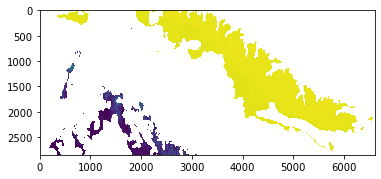

In [72]:
os.chdir('/users/marianne/documents/data/reanalysis/h5')
# daily_swe = {}
daily_swe_total = {}
max_day = []
max_swe = []
for yr in range(1985 , 2016):
# for yr in [2000]:
    hf = h5py.File('SN_SWE_WY'+ str(yr) + '.h5', 'r')
    swe = hf.get('SWE')
    dailyswe = []
    numpixels = []
    for i in range(365):
        swe_tmp = np.array(swe[i,:,:])/1000000
        swe_tmp=swe_tmp[swe_tmp>0]
        dailyswe.append(np.nansum(swe_tmp))
        numpixels.append(len(swe_tmp))
    dailyswe=np.array(dailyswe)
    numpixels = np.array(numpixels)
    maxswe = np.nanmax(dailyswe[numpixels>1e6])
    maxday = np.where(dailyswe == maxswe)[0][0]
    daily_swe_total[yr] = dailyswe
    max_day.append(maxday)
    max_swe.append(maxswe)


os.chdir('/users/marianne/documents/data/reanalysis/')
np.save('daily_swe_sum.npy',daily_swe_total)
np.save('max_day.npy',max_day)
np.save('max_swe',max+swe)



In [4]:
import numpy as np
os.chdir('/users/marianne/documents/data/reanalysis/')
daily_swe_total = np.load('daily_swe_avg.npy',allow_pickle=True)
max_day = np.load('max_day.npy',allow_pickle=True)
max_swe = np.load('max_swe.npy',allow_pickle=True)

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

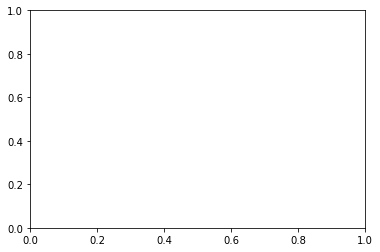

In [6]:
fig,ax=plt.subplots()
for i in range(1985,2000):
    tmp = daily_swe_total[i]
    # ax.plot(tmp)
    # tmp[np.where(tmp<0)] += (21470*2) # np.abs(tmp[np.where(tmp<0)])
    ax.plot(tmp,label = str(i))
# ax.set_ylim([0,5e9])
ax.legend()

In [8]:
import matplotlib
import matplotlib.cm as cm
blues = cm.get_cmap('Blues', 256)
newcolors = blues(np.linspace(0, 1, 256))
white = np.array([1,1,1,0])
newcolors[:10, :] = white
newcmp = matplotlib.colors.ListedColormap(newcolors)

NameError: name 'swe_april1' is not defined

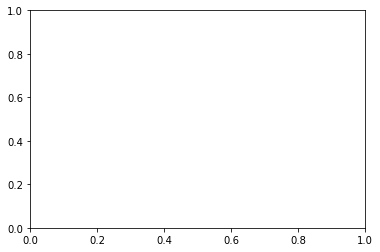

In [18]:
fig,ax=plt.subplots()
im = ax.imshow(swe_april1,cmap=newcmp,vmin=0,vmax=1000,
                            extent=(np.nanmin(lon),
                            np.nanmax(lon),
                            np.nanmin(lat),
                            np.nanmax(lat)))
fig.colorbar(im,ax=ax)
plt.show()

In [19]:
blues = cm.get_cmap('Blues', 256)
newcolors = blues(np.linspace(0, 1, 256))
white = np.array([1,1,1,0])
newcolors[:10, :] = white
newcmp = matplotlib.colors.ListedColormap(newcolors)

In [63]:
swe_april1 = swe_april1.astype(float)
swe_april1[swe_april1<0]=np.nan

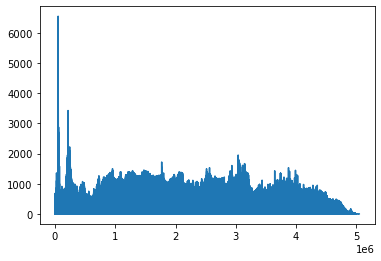

In [80]:
plt.plot(tmp)

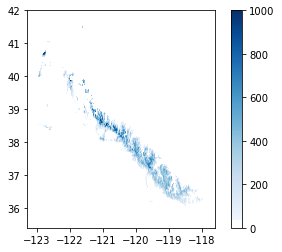

In [72]:
fig,ax=plt.subplots()
im = ax.imshow(swe_april1,cmap=newcmp,vmin=0,vmax=1000,
                            extent=(np.nanmin(lon),
                            np.nanmax(lon),
                            np.nanmin(lat),
                            np.nanmax(lat)))
fig.colorbar(im,ax=ax)
plt.show()

In [14]:
# tmp=tmp[np.where(tmp>0 & tmp<2000]
days = range(90,200,10)
data1990 = {}
for i in days:
    tmp = np.array(swe[i,:,:]).flatten()
    tmp = tmp[np.where((tmp>0) & (tmp<2000))]
    data1990[i]=tmp


NameError: name 'swe' is not defined

In [6]:
os.chdir("../../pe_snow_fires")


In [7]:
import h5py
maxswe_map = {}
i=0
for yr in range(1985,2016):
    file = 'data/data'+str(yr)+'.npy'
    data =np.load(file,allow_pickle=True).reshape((1))[0]
    hf = h5py.File('/users/marianne/documents/data/reanalysis/h5/SN_SWE_WY'+ str(yr) + '.h5', 'r')
    swe = hf.get('SWE')
    '''
    fig,ax=plt.subplots()
    tmp = [data[i] for i in days]
    ax.boxplot(tmp)
    fig.savefig('boxplot'+str(yr)+'.jpg')
    plt.close()
    fig,ax=plt.subplots()
    ax.violinplot(tmp,showextrema=False)
    fig.savefig('violin'+str(yr)+'.jpg')
    plt.close()
    '''
    idx = max_day[i]
    i=i+1
    tmp = swe[idx,:,:]
    maxswe_map[yr] = tmp

In [9]:
import rioxarray as rxr
dataset = rxr.open_rasterio('\\users\\marianne\\documents\\data\\pe_snow_fires_data\\max-ndvi\\max-ndvi-'+str(yr)+'.tif')
os.chdir('/users/marianne/documents/pe_snow_fires')
sn_watersheds= gpd.read_file('data/sn_watersheds.shp')
# mtbs= gpd.read_file('mtbs_perimeter_data/mtbs_perims_DD.shp')
sn_geom = sn_watersheds.to_crs(dataset.rio.crs)
max_ndvi=[]
for yr in range(1980,2016):
    dataset = rxr.open_rasterio('\\users\\marianne\\documents\\data\\pe_snow_fires_data\\max-ndvi\\max-ndvi-'+str(yr)+'.tif')
    avhrr_clip = dataset.rio.clip(sn_geom.geometry,
            all_touched=True,
            from_disk=True)
    max_ndvi.append(np.nanmean(avhrr_clip.values))
    # print(np.nanmean(avhrr_clip.values))

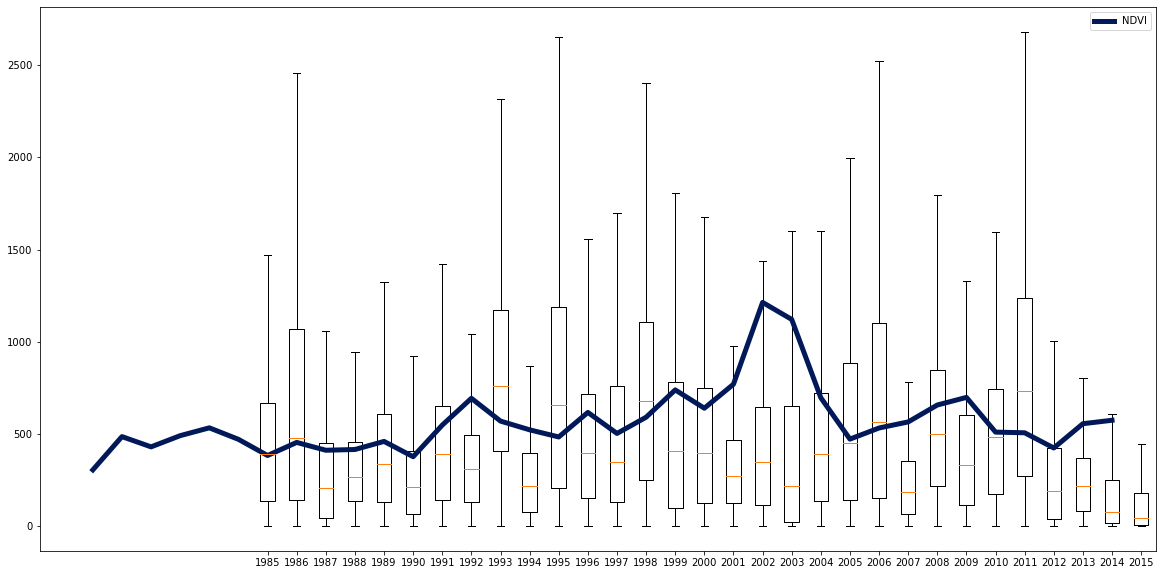

In [13]:
#!pip install cmcrameri
import matplotlib.pyplot as plt
cs = cm.batlow(np.linspace(0,1,7))

fig,ax = plt.subplots(figsize=(20,10))
# tmp = [april1swe[i] for i in range(1985,2016)]
tmp = [maxswe_map[i].flatten() for i in range(1985,2016)]
tmp = [tmp[i][tmp[i]>0] for i in range(len(tmp))]
ax.boxplot(tmp,showfliers=False,positions=range(1985,2016))
# fig.savefig('april1swe.jpg')
# plt.close()
# ax.plot(years_gpp,mean_april_gpp,'-',linewidth=5,color=cs[0] ,label = 'April GPP')
# ax.plot(years_gpp,mean_july_gpp,'-',linewidth=5,color=cs[3],label = 'July GPP')
# ax.plot(years_gpp,mean_august_gpp,'-',linewidth=5,color=cs[4],label = 'August GPP')
ax.plot(range(1979,2015), [i-2000 for i in max_ndvi],'-',linewidth = 5, color = cs[0],label='NDVI')
ax.legend()
plt.show()

In [159]:

days = range(90,200,10)
for yr in range(1985,2017):
    hf = h5py.File(filepath + 'SN_SWE_WY'+str(yr)+ '.h5', 'r')
    swe = hf.get('SWE')
    lat = hf.get('lat')
    lon = hf.get('lon')
    data = {}
    for i in days:
        tmp = np.array(swe[i,:,:]).flatten()
        tmp = tmp[np.where((tmp>0) & (tmp<2000))]
        data[i]=tmp
    np.save('data'+str(yr)+'.npy',data,allow_pickle=True)


In [9]:
april1swe = {}

for yr in range(1985,2017):
    file = 'data/data'+str(yr)+'.npy'
    data =np.load(file,allow_pickle=True).reshape((1))[0]
    '''
    fig,ax=plt.subplots()
    tmp = [data[i] for i in days]
    ax.boxplot(tmp)
    fig.savefig('boxplot'+str(yr)+'.jpg')
    plt.close()
    fig,ax=plt.subplots()
    ax.violinplot(tmp,showextrema=False)
    fig.savefig('violin'+str(yr)+'.jpg')
    plt.close()
    '''
    april1swe[yr] = data[180]




KeyboardInterrupt: 

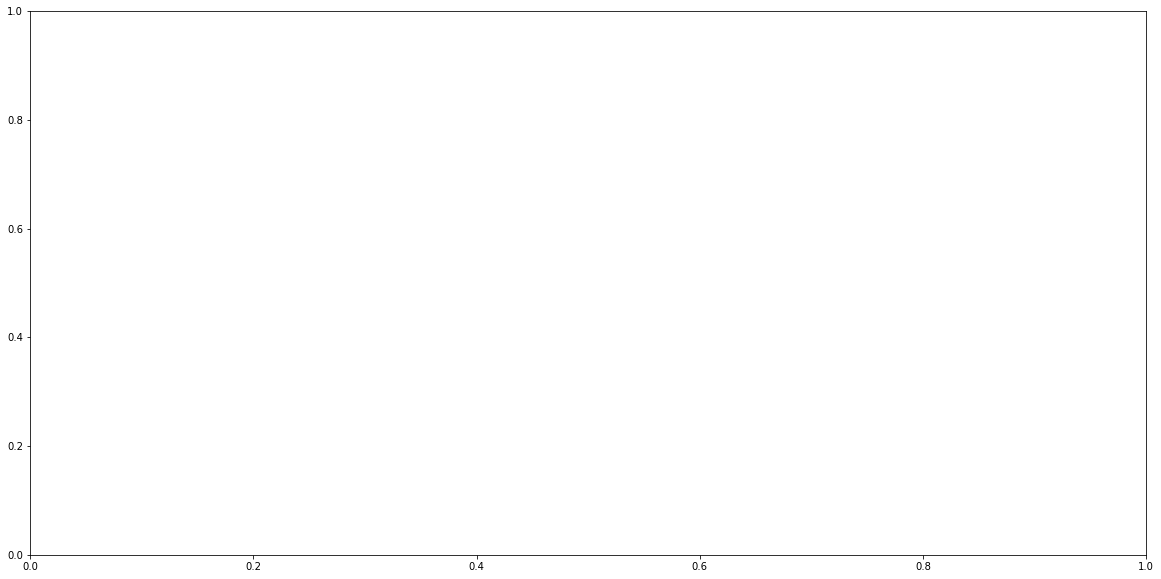

In [166]:
fig,ax = plt.subplots(figsize=(20,10))
tmp = [april1swe[i] for i in range(1985,2016)]
ax.violinplot(tmp,showextrema=False)
fig.savefig('april1swe_violin.jpg')
plt.close()

NameError: name 'april1swe' is not defined

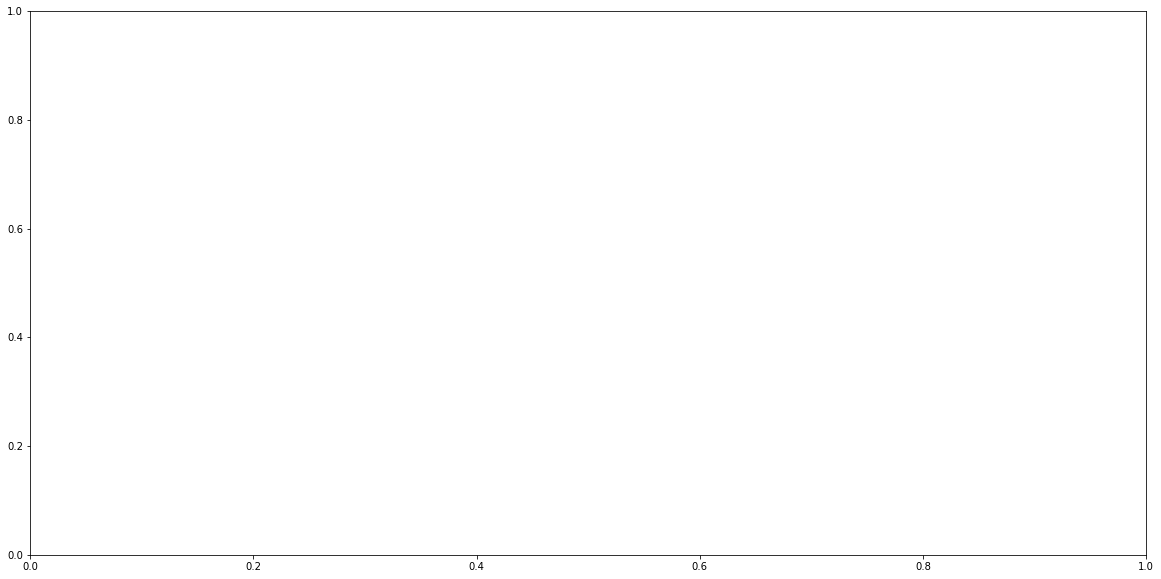

In [21]:
from cmcrameri import cm
cs = cm.batlow(np.linspace(0,1,7))

fig,ax = plt.subplots(figsize=(20,10))
tmp = [april1swe[i] for i in range(1985,2016)]
ax.boxplot(tmp,showfliers=False,positions=range(1985,2016))
ax.plot(years_gpp,mean_april_gpp,'-',linewidth=5,color=cs[0] ,label = 'April GPP')
ax.plot(years_gpp,mean_july_gpp,'-',linewidth=5,color=cs[3],label = 'July GPP')
ax.plot(years_gpp,mean_august_gpp,'-',linewidth=5,color=cs[4],label = 'August GPP')
ax.legend()
plt.show()

In [27]:
mtbs= gpd.read_file('mtbs_perimeter_data/mtbs_perims_DD.shp')


NameError: name 'mtps' is not defined

<AxesSubplot:>

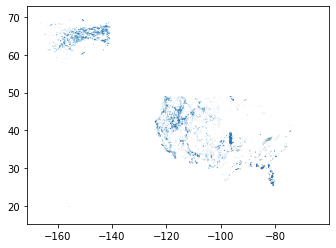

In [28]:
mtbs.plot()

In [18]:
mean_april_gpp= [951.4664443518133,
 704.1253620190319,
 768.3370554177005,
 630.0247933884298,
 909.1195202646816,
 548.3355426677713,
 612.8457402812242,
 845.3971074380165,
 650.9219008264463,
 713.7125154894671,
 532.1344642118329,
 533.9119470855726,
 759.480380008261,
 946.9206939281289,
 864.4333470903838,
 916.4643004539827]
mean_july_gpp = [1315.0396203054065,
 1123.918283120099,
 900.3528683450269,
 793.3012794056954,
 1151.3318200577796,
 993.3351217498969,
 913.4036318613289,
 968.1386710689228,
 879.1820057779612,
 839.4601733388362,
 1081.4255055716055,
 1302.7263722657863,
 1088.8832026413536,
 814.151465125877,
 783.3702022286421,
 1071.7919933966157]
mean_august_gpp = [972.8349153941394,
 924.1403219149814,
 850.6512587701197,
 1064.243912505159,
 1022.331407346265,
 948.098225340487,
 1058.8918695831615,
 871.2711514651259,
 767.4015683037557,
 916.7560874948412,
 990.9186958316137,
 1090.6776723070573,
 737.9711101939744,
 954.0416838629798,
 934.5476681799422,
 844.9083780437475]
years_gpp = range(2000,2016)

In [34]:

fri = xr.open_rasterio('/users/marianne/desktop/fri_west.tif')

In [53]:
ds =fri[:,1000:9000,1000:9000]
#fri.where(fri>=100).squeeze().plot.imshow(cmap="hot_r")

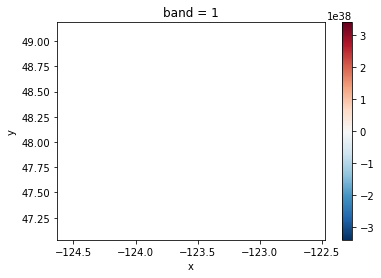

In [54]:
ds.plot()